In [2]:
import pandas as pd
import numpy as np

In [ ]:
last_date='2024-10-31'

In [8]:
portw=pd.read_csv('../data/output/prob_out/prob_res_2014-01-29_2024-10-31_ver0.1.csv')
# hyungshin.lee/data/output/prob_out/prob_res_2014-01-29_2024-08-30_ver0.1.csv

In [9]:
portw.set_index(portw.columns[0], inplace=True)

In [10]:
portw=portw.iloc[-1]

In [11]:
portw.sort_values()

A005930    0.000017
A000100    0.002065
A267260    0.002522
A000660    0.002560
A003230    0.004317
             ...   
A001800    0.015171
A454910    0.015218
A009970    0.015586
A161390    0.017575
A078930    0.026260
Name: 2024-10-31, Length: 200, dtype: float64

In [12]:
# portw.iloc[-1].dropna().sort_values(ascending=False)

In [13]:
factor_data=pd.read_parquet('../data/k200_weekly_factor_data_2011-01-01_2024-10-31v.1.parquet')
price_data=pd.read_parquet('../data/price_data_2011-01-01_2024-10-31.parquet')

In [14]:
price_data.columns=price_data.columns.get_level_values(1)

In [15]:
factor_data.columns

Index(['Market', 'KOSPI200YN', 'FiscalMonth', 'NetAmt_InvTrust_20D',
       'NetAmt_InvTrust_60D', 'NetAmt_InvTrust_120D', 'NetAmt_Inst_20D',
       'NetAmt_Inst_60D', 'NetAmt_Inst_120D', 'NetAmt_For_20D',
       ...
       'trA_60avg_spot', 'adjMomentum', 'earningYield', 'growth', 'momentum',
       'priceReversal', 'priceStdev', 'quality', 'stability', 'value'],
      dtype='object', length=118)

In [16]:
train_col = ['size', 'value', 'earningYield', 
 'quality', 'stability', 'dividend', 'growth', 'momentum', 'adjMomentum', 'priceMomentum', 'priceReversal', 'priceStdev',
 'trading', 'investSentiment', 'cashFlowOtmv', 'cashFlowYOY', 'earningsOtmv', 'earningsYOY',
 'salesOtmv','salesYOY', 'senti_forg20', 'senti_forg60', 'senti_forg120', 'trA_20avg_spot',
 'trA_60avg_spot', 'label']

In [17]:
factor_data[train_col[:-1]]

size        value  earningYield   quality  stability  \
Dates      Symbol                                                               
2014-01-03 A000070  13.299329  1138.531389      0.830736  0.000097    0.30700   
           A000080  14.236462   285.874163     51.529490  0.046308    0.76575   
           A000100  14.526006   360.742932     24.263012  0.010527    0.22020   
           A000120  14.650179   306.560578     17.400744  0.005470    0.30740   
           A000140  12.504279  4233.683998    624.050050  0.034164    1.14495   
...                       ...          ...           ...       ...        ...   
2024-10-31 A383220  14.688556   201.376226    107.549976  0.182967    0.23080   
           A402340  16.251472   209.201831    -59.136945  0.106725    0.05600   
           A450080  15.865837    58.402516     -3.008831 -0.004777    0.45140   
           A454910  15.330717    35.145195     -5.272383 -0.018172    0.03720   
           A457190  14.019643    37.271651     -0.233436  0.085940    0.53590   

                    dividend     growth  momentum  adjMomentum  priceMomentum  \
Dates      Symbol                                                               
2014-01-03 A000070      1.68   1.470288 -0.241584     0.236513       0.160299   
           A000080      4.99  -0.095140 -0.045215    -0.052669      -0.225942   
           A000100      0.80   0.595799  0.915445          NaN       0.002753   
           A000120       NaN   0.534352 -0.277508     0.064242      -0.314473   
           A000140      3.02  -0.162017 -0.122482          NaN      -0.268668   
...                      ...        ...       ...          ...            ...   
2024-10-31 A383220      1.91  -0.155175 -0.086781     0.123970      -0.143310   
           A402340       NaN   2.862695 -1.461176    -0.252501       0.649968   
           A450080       NaN        NaN -7.365251          NaN      -0.043275   
           A454910       NaN        NaN  0.475522          NaN      -0.341718   
           A457190       NaN  15.272513  4.421883     0.006234      -0.596169   

                    ...  cashFlowYOY  earningsOtmv  earningsYOY    salesOtmv  \
Dates      Symbol   ...                                                        
2014-01-03 A000070  ...    -0.828544      1.542624    -0.989009  3973.729673   
           A000080  ...    -0.251800    103.002278    -0.363162  1271.532286   
           A000100  ...    -0.211259     24.263012     1.898020   432.430958   
           A000120  ...    -1.046517     34.764207    -0.842187  1418.938825   
           A000140  ...    -0.068928    624.050050    -0.360550  7359.129163   
...                 ...          ...           ...          ...          ...   
2024-10-31 A383220  ...    -0.264818    214.934571    -0.381910   824.543165   
           A402340  ...     0.582815   -118.647478     0.911115    90.210120   
           A450080  ...          NaN     -3.008831          NaN    73.906626   
           A454910  ...          NaN     -5.272383          NaN    12.019291   
           A457190  ...    48.231810     -0.479143    26.270456   197.795688   

                     salesYOY  senti_forg20  senti_forg60  senti_forg120  \
Dates      Symbol                                                          
2014-01-03 A000070  -0.068909     -324872.0     -252819.0      -384440.0   
           A000080  -0.056187    -3157820.0    -4234950.0     -2600720.0   
           A000100   0.100637     -724868.0    -3264320.0     -3866610.0   
           A000120   0.494341     2030390.0     3713470.0      5923340.0   
           A000140  -0.056573     -231823.0     -281588.0      -276964.0   
...                       ...           ...           ...            ...   
2024-10-31 A383220  -0.205639      146358.0     -427003.0     -2270700.0   
           A402340  10.582687    -8521190.0    -6258120.0      1537500.0   
           A450080        NaN    -6006080.0     6525150.0    -29518500.0   
           A454910        NaN     153087

In [18]:
indicies=pd.read_parquet('../data/krx_idx_2011-01-01_2024-10-31.parquet')

In [19]:
indicies

,코스피,코스피 200,코스피 100,코스피 50,코스닥 150,코스닥,코스피 200 동일가중,코스피 대형주,코스피 중형주,코스피 소형주,...,에너지,소재,산업재,경기소비재,필수소비재,의료,금융,IT,통신서비스,유틸리티
Dates,,,,,,,,,,,,,,,,,,,,,
2000-01-04,1059.04,133.66,NaN,NaN,NaN,2660.00,NaN,1000.00,1000.00,1000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,986.31,123.86,922.14,918.40,NaN,2629.50,NaN,923.61,970.47,992.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,960.79,120.80,900.82,898.72,NaN,2475.20,NaN,904.64,931.49,962.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,948.65,119.10,887.78,883.90,NaN,2276.60,NaN,890.32,938.66,966.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,987.24,124.11,927.12,924.83,NaN,2310.80,NaN,928.70,952.01,975.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-31,2556.15,339.32,2552.24,2344.58,1273.29,743.06,2254.64,2542.08,2882.45,2181.68,...,5891.13,5194.17,5194.75,4469.38,5113.64,24529.1,2553.64,7552.68,1054.42,1365.53
2024-11-01,2542.36,337.49,2542.40,2339.86,1240.99,729.05,2226.83,2532.54,2832.75,2168.25,...,5929.31,5183.72,5169.86,4476.64,5114.69,24029.9,2601.23,7448.62,1056.75,1350.49
2024-11-04,2588.97,343.60,2590.07,2387.52,1305.17,754.08,2257.85,2583.83,2858.96,2186.89,...,5926.16,5326.26,5248.33,4558.69,5244.42,24973.7,2604.38,7617.73,1054.25,1371.93


In [20]:
temp_factor=factor_data.loc['2024-10-31', train_col[:-1]]

In [21]:
temp_factor

,size,value,earningYield,quality,stability,dividend,growth,momentum,adjMomentum,priceMomentum,...,cashFlowYOY,earningsOtmv,earningsYOY,salesOtmv,salesYOY,senti_forg20,senti_forg60,senti_forg120,trA_20avg_spot,trA_60avg_spot
Symbol,,,,,,,,,,,,,,,,,,,,,
A000080,14.224403,326.660810,63.124724,0.081866,0.99630,4.22,0.244160,0.152116,-0.060731,-0.097448,...,0.357840,126.170548,0.570417,1701.852307,0.016588,-1251930.0,-818378.0,-2551780.0,5.487350e+09,5.391330e+09
A000100,16.238072,46.794286,1.159543,0.052620,0.15635,0.65,4.286654,3.441372,0.008204,1.414783,...,0.574318,2.301904,19.993258,167.908503,0.093671,-539112.0,3048800.0,2514040.0,4.659530e+11,5.501460e+11
A000120,14.510117,1046.727281,125.770963,0.054261,0.65630,0.39,0.054896,-0.007450,0.208464,-0.175612,...,0.004959,251.398958,0.004552,5980.393625,0.041575,681096.0,-2040040.0,-2178730.0,6.288770e+09,8.154900e+09
A000150,15.153423,1026.179170,166.725558,0.030060,0.73555,2.13,2.793365,-0.045825,-0.068125,1.060253,...,0.337097,333.420448,0.053143,4950.100759,0.011776,-1713040.0,-5117050.0,3631540.0,2.541810e+10,2.455140e+10
A000210,13.707478,1462.671034,225.096542,0.031366,0.83065,1.95,2.810559,1.775155,0.153071,-0.080040,...,1.017076,449.985851,10.891827,6024.757185,0.180023,206939.0,-33966.0,1612860.0,1.453950e+09,3.164480e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A383220,14.688556,201.376226,107.549976,0.182967,0.23080,1.91,-0.155175,-0.086781,0.123970,-0.143310,...,-0.264818,214.934571,-0.381910,824.543165,-0.205639,146358.0,-427003.0,-2270700.0,8.311700e+09,7.403920e+09
A402340,16.251472,209.201831,-59.136945,0.106725,0.05600,NaN,2.862695,-1.461176,-0.252501,0.649968,...,0.582815,-118.647478,0.911115,90.210120,10.582687,-8521190.0,-6258120.0,1537500.0,3.671330e+10,3.210030e+10
A450080,15.865837,58.402516,-3.008831,-0.004777,0.45140,NaN,NaN,-7.365251,NaN,-0.043275,...,NaN,-3.008831,NaN,73.906626,NaN,-6006080.0,6525150.0,-29518500.0,8.872680e+10,8.835690e+10


In [22]:
temp_factor_rank=temp_factor.rank(0)

In [23]:
temp_factor_rank

,size,value,earningYield,quality,stability,dividend,growth,momentum,adjMomentum,priceMomentum,...,cashFlowYOY,earningsOtmv,earningsYOY,salesOtmv,salesYOY,senti_forg20,senti_forg60,senti_forg120,trA_20avg_spot,trA_60avg_spot
Symbol,,,,,,,,,,,,,,,,,,,,,
A000080,54.0,86.0,106.0,142.0,157.0,117.0,115.0,152.0,72.0,74.0,...,132.0,107.0,144.0,109.0,73.0,42.0,64.0,55.0,65.0,61.0
A000100,163.0,9.0,27.0,82.0,26.0,23.5,193.0,197.0,97.0,198.0,...,150.0,27.0,195.0,15.0,127.0,61.0,162.0,144.0,198.0,198.0
A000120,74.0,164.0,160.0,85.0,117.0,13.0,62.0,72.0,164.0,51.0,...,85.0,161.0,84.0,178.0,96.0,146.0,49.0,58.0,72.0,76.0
A000150,111.0,162.0,182.0,44.0,128.0,74.0,183.0,58.0,71.0,194.0,...,130.0,182.0,91.0,165.0,68.0,35.0,26.0,156.0,137.0,130.0
A000210,23.0,184.0,192.0,46.0,142.0,69.0,184.0,193.0,150.0,84.0,...,170.0,192.0,191.0,179.0,152.0,118.0,94.0,128.0,17.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A383220,84.0,59.0,151.0,195.0,41.0,67.0,13.0,42.0,140.0,62.0,...,44.0,152.0,39.0,74.0,11.0,109.0,77.0,57.0,85.0,73.0
A402340,165.0,63.0,6.0,168.0,6.0,NaN,185.0,7.0,56.0,187.0,...,151.0,5.0,161.0,11.0,197.0,9.0,16.0,126.0,159.0,147.0
A450080,149.0,13.0,19.0,11.0,87.0,NaN,NaN,2.0,NaN,98.0,...,NaN,20.0,NaN,9.0,NaN,12.0,174.0,8.0,181.0,180.0


In [29]:
portw.columns

AttributeError: 'Series' object has no attribute 'columns'

In [24]:
portw.sort_values(portw.columns[0])

AttributeError: 'Series' object has no attribute 'columns'

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
temp_factor_rank.loc[portw.sort_values().head(10).index].T

,A005930,A000100,A267260,A000660,A003230,A012450,A139480,A192820,A042700,A010120
size,200.0,163.0,167.0,199.0,114.0,179.0,65.0,63.0,153.0,128.0
value,73.0,9.0,11.0,30.0,19.0,29.0,197.0,56.0,2.0,53.0
earningYield,69.0,27.0,60.0,65.0,77.0,61.0,28.0,89.0,38.0,86.0
quality,118.0,82.0,200.0,196.0,197.0,186.0,16.0,192.0,199.0,171.0
stability,21.0,26.0,159.0,79.0,94.0,169.0,133.0,168.0,10.0,110.0
dividend,65.0,23.5,47.0,36.0,38.5,53.0,89.0,14.0,25.0,113.0
growth,162.0,193.0,160.0,181.0,142.0,169.0,151.0,133.0,192.0,123.0
momentum,182.0,197.0,166.0,185.0,161.0,176.0,13.0,124.0,195.0,133.0
adjMomentum,1.0,97.0,114.0,11.0,136.0,104.0,117.0,128.0,88.0,118.0
priceMomentum,58.0,198.0,200.0,165.0,197.0,199.0,30.0,152.0,185.0,193.0


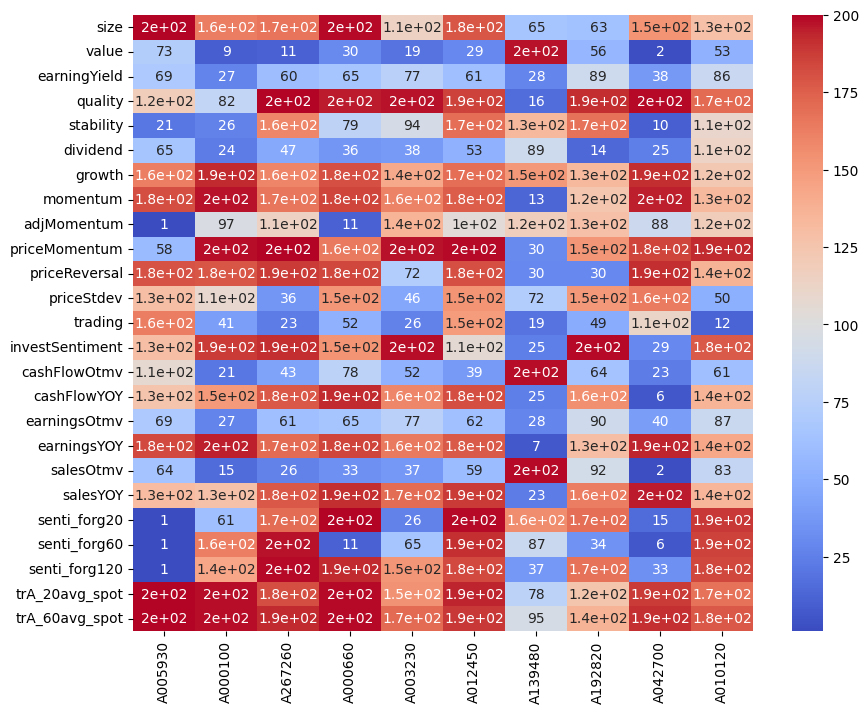

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(temp_factor_rank.loc[portw.sort_values().head(10).index].T, annot=True, cmap='coolwarm')
plt.show()

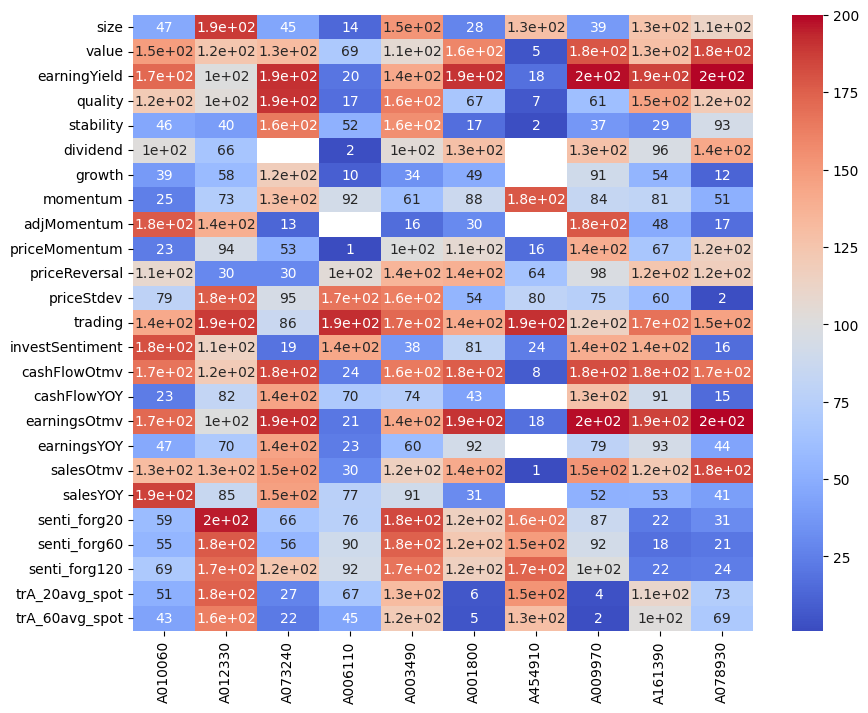

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(temp_factor_rank.loc[portw.sort_values().dropna().tail(10).index].T, annot=True, cmap='coolwarm')
plt.show()

In [22]:
test_data=pd.read_pickle('../data/output/test_winsorized.pickle')

In [23]:
test_data

size     value  earningYield   quality  stability  \
Dates      Symbol                                                           
2024-06-07 A000080 -0.475158 -0.344939     -0.149469  0.013849  -0.086259   
           A000100  0.778681 -0.765049     -0.662832 -0.123880  -0.119224   
           A000120 -0.068025  0.555766      0.519021 -0.062260  -0.098314   
           A000150  0.326907  0.782000      1.507745 -0.257459  -0.095175   
           A000210 -0.563341  0.722330      0.459138 -0.228315  -0.094937   
...                      ...       ...           ...       ...        ...   
2024-06-28 A383220 -0.054811 -0.564695      0.602716  1.283464  -0.111318   
           A402340  1.355909 -0.633269     -1.286055 -0.103700  -0.118587   
           A450080  0.732933 -0.840350     -0.704968 -0.452891  -0.109921   
           A454910  0.575905 -0.873666     -0.717469 -0.470491  -0.122395   
           A457190 -0.467696 -0.792152     -0.731474 -0.388057  -0.070885   

                    dividend    growth  momentum  adjMomentum  priceMomentum  \
Dates      Symbol                                                              
2024-06-07 A000080 -0.092221 -0.079539  0.066374     0.069761      -0.167158   
           A000100 -0.092990 -0.082314  0.062407     0.185241       0.615419   
           A000120 -0.093046 -0.080787  0.065042     0.271269       1.389421   
           A000150 -0.092671 -0.074754  0.065665     0.157999       2.670424   
           A000210 -0.092710 -0.056647  0.069940     0.259922       1.131107   
...                      ...       ...       ...          ...            ...   
2024-06-28 A383220 -0.092719 -0.082114  0.064767     0.273999      -0.901994   
           A402340       NaN  0.107497 -0.084124     0.134410       2.131363   
           A450080       NaN -0.033393  0.061354     0.177231            NaN   
           A454910       NaN -0.045006  0.067013     0.177812            NaN   
           A457190       NaN       NaN  0.071655          NaN      -2.073063   

                    ...  cashFlowYOY  earningsOtmv  earningsYOY  salesOtmv  \
Dates      Symbol   ...                                                      
2024-06-07 A000080  ...    -0.071795     -0.101581    -0.072772  -0.144533   
           A000100  ...    -0.073632     -0.684277    -0.095351  -0.718565   
           A000120  ...    -0.071675      0.657232    -0.075452   1.110791   
           A000150  ...    -0.069704      1.780543    -0.076846   1.106795   
           A000210  ...    -0.066892      0.588865    -0.049767   0.710107   
...                 ...          ...           ...          ...        ...   
2024-06-28 A383220  ...    -0.073522      0.751900    -0.079683  -0.507108   
           A402340  ...    -0.059026     -1.392841    -0.049583  -0.794727   
           A450080  ...          NaN     -0.731983          NaN  -0.777327   
           A454910  ...          NaN     -0.746179          NaN  -0.822028   
           A457190  ...          NaN     -0.740406          NaN  -0.780824   

                    salesYOY  senti_forg20  senti_forg60  senti_forg120  \
Dates      Symbol                                                         
2024-06-07 A000080 -0.079077     -0.092086     -0.071528      -0.045645   
           A000100 -0.079162     -0.118352     -0.049172      -0.071485   
           A000120 -0.079041     -0.137696      0.024723       0.020943   
           A000150 -0.079090      0.309756      0.609748       0.567511   
           A000210 -0.078877      0.054996      0.083143       0.081592   
...                      ...           ...           ...            ...   
2024-06-28 A383220 -0.079110     -0.049158     -0.033201      -0.028955   
           A402340  0.175751      0.332607      0.474901       1.143955   
           A450080       NaN     -1.693600     -1.179092      -0.215458   
           A454910       NaN      0.659278      0.470233       0.370547   
           A457190       NaN     -0.068443      0.024980       0.1

In [24]:
avg_data=test_data.describe().T['m

SyntaxError: unterminated string literal (detected at line 1) (3981379546.py, line 1)

In [ ]:
avg_data

In [ ]:
check_data

In [ ]:
top_pct=[]
for ticker in top_tickers:
    check_data=test_data[test_data.index.get_level_values(1)==ticker].mean()
    percentiles = {}
    for col in test_data.columns:
        percentile_rank = np.sum(test_data[col] <= check_data.loc[col]) / len(test_data[col]) * 100
        percentiles[col] = percentile_rank
        # print(f'Percentile rank of {col} for {ticker}: {percentile_rank:.2f}%')
    top_pct.append(percentiles)

In [ ]:
pd.DataFrame(top_pct, index=top_tickers).iloc[:, 10:-10]

In [ ]:
bottom_pct=[]
for ticker in bottom_tickers:
    check_data=test_data[test_data.index.get_level_values(1)==ticker].mean()
    percentiles = {}
    for col in test_data.columns:
        percentile_rank = np.sum(test_data[col] <= check_data.loc[col]) / len(test_data[col]) * 100
        percentiles[col] = percentile_rank
        # print(f'Percentile rank of {col} for {ticker}: {percentile_rank:.2f}%')
    bottom_pct.append(percentiles)

In [ ]:
pd.DataFrame(bottom_pct, index=bottom_tickers).iloc[:, 10:-10]

In [ ]:
train_col

In [ ]:
factor_rank=factor_data[train_col[:-1]].groupby('Dates').rank(ascending=False)

In [ ]:
factor_data[train_col[0]]

In [ ]:
factor_data[train_col[0]].groupby('Dates').rank()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
indicies.columns

In [ ]:
long_ls=[]
short_ls=[]

for col_idx, col in enumerate(train_col[:-1]):
    temp_factor_rank=factor_data[col].groupby('Dates').rank(ascending=False)
    temp_factor_rank=temp_factor_rank.groupby('Dates').apply(lambda x: x.sort_values())
    
    long_port=temp_factor_rank.groupby('Dates').head(20)
    long_port=long_port.unstack()
    long_port.index=long_port.index.get_level_values(0)
    
    short_port=temp_factor_rank.groupby('Dates').tail(20)
    short_port=short_port.unstack()
    short_port.index=short_port.index.get_level_values(0)
    
    long_port[long_port>0]=1/20
    short_port[short_port>0]=-1/20

    ret_weekly=price_data.loc[long_port.index, :].pct_change().replace(np.inf, 0)
    # price_data.loc[short_port.index, short_port.columns].fillna(0).pct_change().replace(np.inf, 0)
    long_ret_weekly=long_port.shift(4) * ret_weekly
    short_ret_weekly=short_port.shift(4) * ret_weekly
    
    long_ls.append(long_ret_weekly)
    short_ls.append(short_ret_weekly)
    
    (1+long_ret_weekly.sum(1)+short_ret_weekly.sum(1)).cumprod().plot(label='LS')
    (1+long_ret_weekly.sum(1)).cumprod().plot(label='long')
    (1+short_ret_weekly.sum(1)).cumprod().plot(label='short')
    (1+indicies.loc[long_port.index, '코스피 200'].pct_change()).cumprod().plot(label='k200')
    print(col, col_idx)
    plt.title(col + str(col_idx))
    plt.legend()
    plt.show()

In [ ]:
temp_factor_rank

In [ ]:
long_ls[1].iloc[-1].sort_values().dropna()

In [ ]:
short_ls[1].iloc[-1].sort_values().dropna()

In [ ]:
price_data.loc[short_ls[0].index].loc['2017-06-01':'2017-06-09', short_ls[0].loc['2017-06-09'].dropna().index].pct_change().T

In [ ]:
ret_weekly.loc['2017-06-09', short_ls[0].loc['2017-06-09'].dropna().index].dropna()

In [ ]:
(1+long_ls[12].sum(1)).cumprod().plot()

In [ ]:
long_ls[12].sum(1).plot()

In [ ]:
short_ls[12].sum(1).plot()

In [ ]:
(1+short_ls[12].sum(1)).cumprod().plot()

In [ ]:
(1+long_ls[11].sum(1)+short_ls[11].sum(1)).cumprod()
